In [84]:
#K-Means Clustering

In [85]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt


In [86]:
df = pd.read_csv("income_data.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [87]:
X = df[['Age', 'Income($)']]

In [88]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [89]:
Kmeans = KMeans(n_clusters=3, random_state=42)
Kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [90]:
df['Cluster'] = Kmeans.labels_

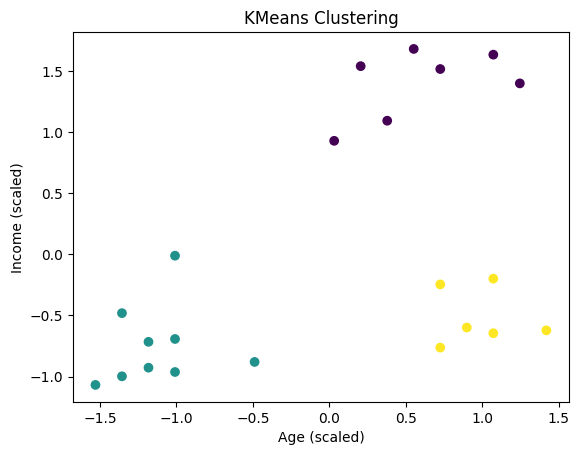

In [91]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Kmeans.labels_, cmap='viridis')
plt.xlabel('Age (scaled)')
plt.ylabel('Income (scaled)')
plt.title('KMeans Clustering')
plt.show()

In [92]:
print(df[['Name', 'Age', 'Income($)', 'Cluster']])

        Name  Age  Income($)  Cluster
0        Rob   27      70000        1
1    Michael   29      90000        1
2      Mohan   29      61000        1
3     Ismail   28      60000        1
4       Kory   42     150000        0
5     Gautam   39     155000        0
6      David   41     160000        0
7     Andrea   38     162000        0
8       Brad   36     156000        0
9   Angelina   35     130000        0
10    Donald   37     137000        0
11       Tom   26      45000        1
12    Arnold   27      48000        1
13     Jared   28      51000        1
14     Stark   29      49500        1
15    Ranbir   32      53000        1
16    Dipika   40      65000        2
17  Priyanka   41      63000        2
18      Nick   43      64000        2
19      Alia   39      80000        2
20       Sid   41      82000        2
21     Abdul   39      58000        2


In [93]:
#K-Modes Clustering

In [94]:
df = pd.read_csv("income_data.csv")

In [95]:
df['Age_bin'] = pd.cut(df['Age'], bins=3, labels=['Young', 'Middle-aged', 'Old'])
df['Income_bin'] = pd.cut(df['Income($)'], bins=3, labels=['Low', 'Medium', 'High'])

In [96]:
X_cat = df[['Name', 'Age_bin', 'Income_bin']]

In [97]:
# Encode categorical data into numerical form for evaluation
label_encoders = {}
X_encoded = X_cat.copy()
for column in X_encoded.columns:
    le = LabelEncoder()
    X_encoded[column] = le.fit_transform(X_encoded[column])
    label_encoders[column] = le

In [98]:
# Perform K-Modes clustering
kmode = KModes(n_clusters=3, init='Huang', random_state=42)  # You can change the number of clusters
clusters = kmode.fit_predict(X_cat)

In [99]:
df['Cluster'] = clusters

# Evaluate clustering performance (using encoded data)
silhouette_avg = silhouette_score(X_encoded, clusters)
davies_bouldin = davies_bouldin_score(X_encoded, clusters)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

# Print the clustered data
print(df[['Name', 'Age', 'Income($)', 'Cluster']])

Silhouette Score: 9.192815383830695e-05
Davies-Bouldin Index: 2.9843268181787543
        Name  Age  Income($)  Cluster
0        Rob   27      70000        1
1    Michael   29      90000        1
2      Mohan   29      61000        1
3     Ismail   28      60000        1
4       Kory   42     150000        2
5     Gautam   39     155000        2
6      David   41     160000        2
7     Andrea   38     162000        2
8       Brad   36     156000        2
9   Angelina   35     130000        2
10    Donald   37     137000        2
11       Tom   26      45000        1
12    Arnold   27      48000        1
13     Jared   28      51000        1
14     Stark   29      49500        1
15    Ranbir   32      53000        0
16    Dipika   40      65000        0
17  Priyanka   41      63000        0
18      Nick   43      64000        0
19      Alia   39      80000        0
20       Sid   41      82000        0
21     Abdul   39      58000        0
